In [131]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [132]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#https://drive.google.com/file/d/1cnOMyllyCxfWDBwmDzJjHVt4_fxD8yMF/view?usp=sharing

In [133]:
Exit_prediction=drive.CreateFile({'id':'1cnOMyllyCxfWDBwmDzJjHVt4_fxD8yMF'})

In [134]:
Exit_prediction.GetContentFile('Churn_Modelling.csv')

In [135]:
import pandas as pd
df = pd.read_csv('Churn_Modelling.csv')
#https://drive.google.com/file/d/1cnOMyllyCxfWDBwmDzJjHVt4_fxD8yMF/view?usp=sharing
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


 Row Number, Customer Id, and Surname are useless for our prediction. So we will eliminate these three independent variables in the next step.

In [136]:
#Import the Libraries-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
df.shape

(10000, 14)

In [138]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [139]:
df['Exited'].unique()

array([1, 0])

Importing the dataset

In [140]:
X=df.iloc[:,3:13]
Y=df.iloc[:,13]

Convert Categorical Features into dummy variables

In [141]:
States=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [142]:
States.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [143]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


Drop the geography column as it no longer required

In [144]:
X=X.drop(['Geography','Gender'],axis=1)

Concatenate the remaining dummies column

In [145]:
X=pd.concat([X,States,gender],axis=1)

In [146]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


Splitting the dataset into training set and  test set

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [148]:
X_test_final=X_test

In [149]:
X_test_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [151]:
X.shape

(10000, 11)

**11 Features will be my input features next layer will be 6 neurons ,next layer will be again 6 neurons and the output will be either zero or one  and will tell the customer will be exit or not**




1.   The formula is 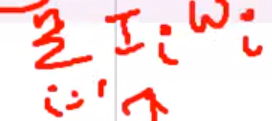
2.   After the summation it will pass into Activation function
3.   There are many Activation functions like sigmoid,relu,Threshold
4.   we will use Relu activation function where we will transform the summation to max(0,x)
5.   Sigmoid function will be like 's' (1/1+e-x)





# ANN model Building

In [152]:
import keras
from keras.models import Sequential#sequential Neural Network
from keras.layers import Dense#adding the hidden layer

In [153]:
#Initializing the  ANN
classifier=Sequential()


In [154]:
#Adding theinput layer and the first  hidden layer
classifier.add(Dense(activation='relu',input_dim=11,units=6,kernel_initializer='uniform'))

In [155]:
#Adding the second hidden layer
classifier.add(Dense(activation='relu',units=6,kernel_initializer="uniform"))

In [156]:
#Adding the output layer
classifier.add(Dense(activation='sigmoid',units=1,kernel_initializer="uniform"))

In [157]:
classifier.summary()
#Fisrt hidden layer we have 6
#Second hidden layer we have 6
#Third output layer we have 1

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [158]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#adam--reduce the cost function
#reason why we use binary_crossentropy coz we have two classes
#Metrics -we use is accuracy
#If we have more than 2 classes we will use categorical cross entropy

Epochs-Forward and backward propogation

In [159]:
#Fitting the ANN to the training set
classifier.fit(X_train,Y_train,batch_size=10,epochs=100)


Epoch 1/100
800/800 [==============================] - 1s 877us/step - loss: 0.5692 - accuracy: 0.7896
Epoch 2/100
800/800 [==============================] - 1s 973us/step - loss: 0.4307 - accuracy: 0.7930
Epoch 3/100
800/800 [==============================] - 1s 969us/step - loss: 0.4364 - accuracy: 0.7893
Epoch 4/100
800/800 [==============================] - 1s 879us/step - loss: 0.4208 - accuracy: 0.7941
Epoch 5/100
800/800 [==============================] - 1s 876us/step - loss: 0.4123 - accuracy: 0.8267
Epoch 6/100
800/800 [==============================] - 1s 882us/step - loss: 0.4196 - accuracy: 0.8278
Epoch 7/100
800/800 [==============================] - 1s 868us/step - loss: 0.4203 - accuracy: 0.8270
Epoch 8/100
800/800 [==============================] - 1s 882us/step - loss: 0.4132 - accuracy: 0.8323
Epoch 9/100
800/800 [==============================] - 1s 944us/step - loss: 0.4014 - accuracy: 0.8376
Epoch 10/100
800/800 [==============================] - 1s 936us/step - l

Here the loss is 0.3339 and the accuracy is 86%

In [195]:
#Make the prediction and evaluating the model
y_pred=classifier.predict(X_test)

In [161]:
y_pred

array([[0.21078485],
       [0.3283767 ],
       [0.1873892 ],
       ...,
       [0.16066739],
       [0.17445484],
       [0.10787082]], dtype=float32)

In [196]:
#when ever y_pred is greater than 0.5 we will consider it
y_pred=(y_pred>0.5)
#It is either going to give me zero/One

In [163]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [197]:
y_pred_df=pd.DataFrame(y_pred)

In [199]:
y_pred_df.columns=['predicted']

In [201]:
y_pred_df.head()

,predicted
0,False
1,False
2,False
3,False
4,False


In [202]:
y_pred_df=y_pred_df.set_index('predicted')

In [179]:
pd.set_option('display.max_rows',5000)
pd.set_option('display.max_columns',5000)

Index([False, False, False, False, False,  True, False, False, False,  True,
       ...
       False, False, False, False, False, False, False, False, False, False],
      dtype='object', name='predicted', length=2000)

In [190]:
#X_test_final=X_test_final.drop('Predicted',axis=1)

In [209]:
y_pred_df.columns

Index([], dtype='object')

In [210]:
X_test_final['predicted']=y_pred_df.index

In [211]:
X_test_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,predicted
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0,False
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0,False
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0,False
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1,False
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1,False
8225,670,57,3,175575.95,2,1,0,99061.75,0,1,0,True
5506,590,34,0,65812.35,2,0,1,160346.30,0,1,1,False
6451,636,29,6,157576.47,2,1,1,101102.39,0,1,0,False
2670,598,64,9,0.00,1,0,1,13181.37,0,0,0,False
3497,456,63,1,165350.61,2,0,0,140758.07,0,0,0,True


Confusion matrix

In [215]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
accuracy=accuracy_score(Y_test,y_pred)

In [216]:
cm

array([[1549,   46],
       [ 270,  135]])

Accuracy

In [217]:
accuracy

0.842